# Singer identification (DWT): SVM and GMM

## Import library

In [1]:
# For feature selection
import sklearn as sk
from sklearn.feature_selection import f_classif , f_regression , SelectKBest
# For mathematical operation
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy,sklearn
# For plot
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# For SVM
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
# For GMM
from sklearn.mixture import GaussianMixture

## Import dataframe

In [3]:
data=pd.read_csv('/media/mydata/PROJET/Pratical_part/data2/Voice_data.csv')
data

,Mean_H1,Sp_Entropy_H1,Mean_H2,Sp_Entropy_H2,Mean_H3,Sp_Entropy_H3,Mean_H4,Sp_Entropy_H4,Mean_A4,Sp_Entropy_A4,Psd_H1,Psd_H2,Psd_H3,Psd_H4,Psd_A4,Median_init_s,Mean_init_s,Std_init_s,label
0,-2.767635e-06,6.086917,-8.122350e-06,5.789609,0.000044,5.485938,-1.104348e-04,5.562813,1.221407e-04,6.643554,1.203379e-08,9.520795e-08,1.704677e-06,8.623802e-06,5.713514e-07,-8.614585e-05,1.221407e-04,0.080451,0
1,9.903641e-07,5.924357,-2.666666e-06,5.927631,-0.000005,5.648147,-4.494554e-04,6.258332,-3.419754e-04,6.044137,7.719328e-09,5.059786e-08,4.547577e-07,1.487991e-06,2.205944e-06,-2.942673e-04,-3.419754e-04,0.157682,0
2,-3.991461e-06,5.884581,8.081545e-05,5.915787,-0.000045,6.315819,-1.084176e-04,6.312084,-4.067170e-04,6.459942,6.620830e-09,4.221092e-08,3.335763e-07,1.376970e-06,1.902315e-06,-8.534620e-04,-4.067170e-04,0.145039,0
3,6.122799e-07,5.407758,-5.134893e-06,5.621631,-0.000025,6.115254,9.147148e-08,5.765347,3.107981e-05,6.153816,3.710092e-09,1.945682e-08,1.115178e-07,1.010719e-06,1.397418e-06,-8.679825e-06,3.107981e-05,0.125409,0
4,6.602558e-07,6.208037,1.000902e-05,6.058609,-0.000005,5.396710,-4.133421e-04,6.451705,-4.551600e-05,6.371458,2.959253e-09,1.433651e-08,3.174845e-07,2.133410e-06,1.164007e-06,2.074146e-04,-4.551600e-05,0.113734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.044509e-06,6.310970,2.993772e-06,5.928382,0.000108,5.763827,1.011650e-03,6.390020,8.930250e-04,6.277928,1.460681e-08,9.234377e-08,1.099245e-06,2.658335e-06,4.935227e-06,4.058493e-04,8.930250e-04,0.237594,3
196,1.260743e-05,6.068405,9.602555e-06,5.933801,-0.000190,6.204364,1.479664e-04,6.717163,2.962594e-03,6.347437,1.299430e-08,8.394619e-08,6.180983e-07,1.805873e-06,4.416657e-06,4.895230e-04,2.962594e-03,0.222995,3
197,-1.410851e-05,6.329816,3.119939e-06,5.849401,-0.000159,6.389041,-1.683446e-03,6.593080,7.500756e-04,5.809495,1.174558e-08,7.438473e-08,4.991811e-07,9.459558e-07,5.215095e-06,5.311960e-04,7.500756e-04,0.244388,3
198,2.522227e-06,6.247359,1.826751e-05,6.021408,0.000022,6.387305,-5.628609e-04,6.749530,-5.746579e-04,5.618644,1.318221e-08,7.928017e-08,5.859979e-07,1.318666e-06,5.578285e-06,-1.624610e-04,-5.746579e-04,0.253807,3


## Feature selection


### Select KBest

In [3]:
def select_kbest_clf(data_frame, target, k):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores 

In [4]:
select_kbest_clf(data , 'label' ,k=15)

,F Score,P Value,Support,Attribute
0,0.238669,8.693116e-01,False,Mean_H1
1,37.256875,4.250148e-19,True,Sp_Entropy_H1
2,0.119500,9.485590e-01,False,Mean_H2
3,2.985713,3.235310e-02,True,Sp_Entropy_H2
4,0.409390,7.464276e-01,True,Mean_H3
5,24.194210,2.306043e-13,True,Sp_Entropy_H3
6,0.383238,7.651950e-01,False,Mean_H4
7,41.640272,7.283608e-21,True,Sp_Entropy_H4
8,1.445426,2.308478e-01,True,Mean_A4
9,18.422648,1.432628e-10,True,Sp_Entropy_A4


In [5]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Mean_H1,Sp_Entropy_H1,Mean_H2,Sp_Entropy_H2,Mean_H3,Sp_Entropy_H3,Mean_H4,Sp_Entropy_H4,Mean_A4,Sp_Entropy_A4,Psd_H1,Psd_H2,Psd_H3,Psd_H4,Psd_A4,Median_init_s,Mean_init_s,Std_init_s,label
Mean_H1,1,-0.0106309,-0.0916623,0.0633798,-0.0974128,0.0298591,-0.0611189,-0.0119033,-0.0385096,-0.13367,0.206243,0.103614,0.10435,0.0585501,-0.0884084,-0.119715,-0.0385096,-0.0797557,-0.0474039
Sp_Entropy_H1,-0.0106309,1,-0.05997,0.341609,0.0145963,0.401883,0.0663576,0.348482,-0.0393935,-0.244055,0.185585,0.12181,0.109009,0.0344784,0.495411,-0.00431998,-0.0393935,0.497626,0.458527
Mean_H2,-0.0916623,-0.05997,1,-0.0606089,-0.000398148,-0.046875,-0.00406999,0.0222132,0.0306451,0.0685226,-0.0507308,-0.018034,-0.0448336,0.0142013,0.0394811,-0.0509692,0.0306451,0.0361964,-0.033105
Sp_Entropy_H2,0.0633798,0.341609,-0.0606089,1,0.0594817,0.119527,0.0555689,0.370518,0.11207,0.131343,0.062315,-0.199052,-0.0359132,0.0108084,0.024421,0.0101744,0.11207,0.0483226,0.125
Mean_H3,-0.0974128,0.0145963,-0.000398148,0.0594817,1,0.0498941,-0.0767198,-0.0609155,0.0549527,0.0528881,0.132228,0.00959758,-0.0451244,-0.042234,-0.0289574,0.0052614,0.0549527,-0.0344201,-0.0721429
Sp_Entropy_H3,0.0298591,0.401883,-0.046875,0.119527,0.0498941,1,-0.0311759,0.357111,-0.116401,-0.134124,0.345478,0.27135,-0.0493315,-0.137084,0.473762,-0.0844287,-0.116401,0.504652,0.45069
Mean_H4,-0.0611189,0.0663576,-0.00406999,0.0555689,-0.0767198,-0.0311759,1,0.0799878,-0.0143525,0.00880437,-0.102696,-0.126963,-0.0807756,-0.055698,0.0509725,-0.0132676,-0.0143525,0.0586263,0.0740068
Sp_Entropy_H4,-0.0119033,0.348482,0.0222132,0.370518,-0.0609155,0.357111,0.0799878,1,-0.124098,0.117418,0.240716,0.143025,0.0658734,-0.0782849,0.395136,0.00784938,-0.124098,0.400826,0.619918
Mean_A4,-0.0385096,-0.0393935,0.0306451,0.11207,0.0549527,-0.116401,-0.0143525,-0.124098,1,-0.0663551,0.0792119,-0.0335216,-0.00153673,0.0166576,-0.0407985,0.466011,1,-0.0619959,-0.09287
Sp_Entropy_A4,-0.13367,-0.244055,0.0685226,0.131343,0.0528881,-0.134124,0.00880437,0.117418,-0.0663551,1,-0.00927689,0.0156883,0.119785,0.145834,-0.230533,0.0278425,-0.0663551,-0.198613,0.013717


In [4]:
#lst=['Mean_H1','Sp_Entropy_H1','Mean_H2','Sp_Entropy_H2','Mean_H3','Sp_Entropy_H3','Mean_H4','Sp_Entropy_H4','Mean_A4','Sp_Entropy_A4','Psd_H1','Psd_H2','Psd_H3','Psd_H4','Psd_A4','Median_init_s','Mean_init_s','Std_init_s']
X = (data.drop(['label','Psd_H3','Psd_A4','Mean_A4'], axis=1))
y = (data['label'])

### Impact of parameters

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

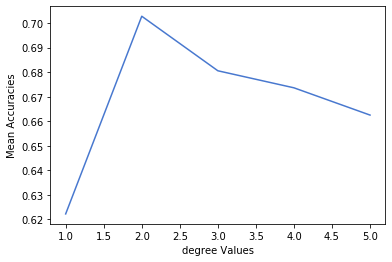

In [343]:
degree_vals = [1,2,3,4,5]
accuracy_vals = []
for g in degree_vals:
    svc = SVC(kernel='poly',degree=g)
    scores = cross_val_score(svc, X, y, cv=15, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(degree_vals, accuracy_vals)
plt.xlabel('degree Values')
plt.ylabel('Mean Accuracies')
plt.show()

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

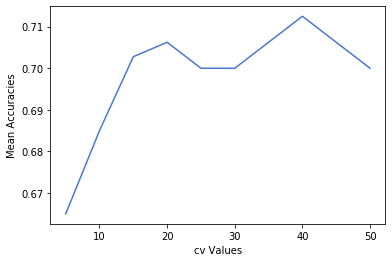

In [347]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='poly',degree=2)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

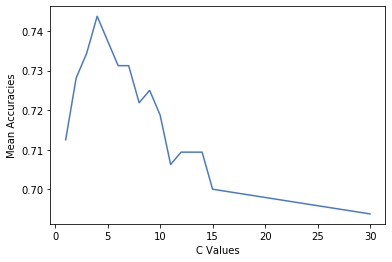

In [348]:
C_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,30]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='poly',degree=2,C=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()

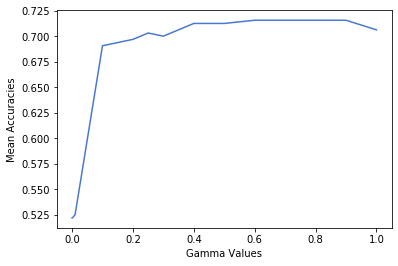

In [219]:
gamma_vals = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracy_vals = []
for g in gamma_vals:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(gamma_vals, accuracy_vals)
plt.xlabel('Gamma Values')
plt.ylabel('Mean Accuracies')
plt.show()

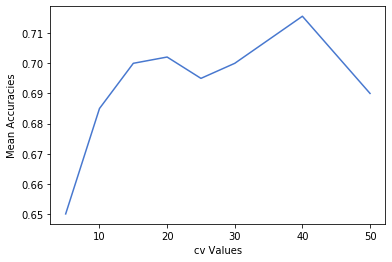

In [220]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='rbf', gamma=0.7)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

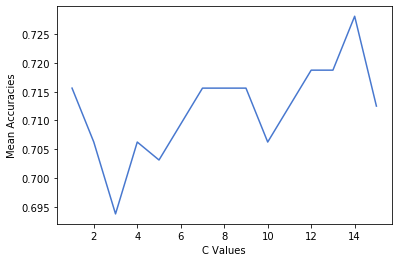

In [225]:
C_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='rbf', gamma=0.7,C=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()

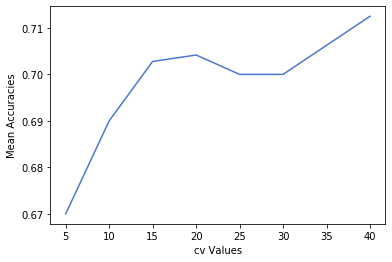

In [270]:
cv_vals = [5,10,15,20,25,30,40]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

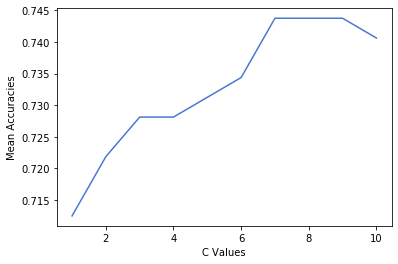

In [265]:
C_vals = [1,2,3,4,5,6,7,8,9,10]
accuracy_vals = []
for g in C_vals:
    svc = SVC(kernel='linear',C=g)
    scores = cross_val_score(svc, X, y, cv=40, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(C_vals, accuracy_vals)
plt.xlabel('C Values')
plt.ylabel('Mean Accuracies')
plt.show()

#### SVM polynomial

In [350]:
svc = SVC(kernel='poly',degree=2,C=4)
scores = cross_val_score(svc, X, y, cv=37, scoring='accuracy')
print(scores.mean())

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

0.7601351351351351


/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

#### LINEAR

In [283]:
svc = SVC(kernel='linear',C=7)
scores = cross_val_score(svc, X, y, cv=37, scoring='accuracy')
print(scores.mean())

0.7635135135135135


#### RBF

In [292]:
svc = SVC(kernel='rbf', gamma=0.7,C=14)
scores = cross_val_score(svc, X, y, cv=37, scoring='accuracy')
print(scores.mean())

0.7466216216216216


## GMM

In [327]:
lst=[]
for i in range(5):
#    parameters = {'n_init':[1,2,3,4,5,6,7,8,9,10,15,20]}
    classifiers = GaussianMixture(n_components =4,n_init=2)
#    clf = GridSearchCV(classifiers, parameters)
    scores = cross_val_score(classifiers, X, y, cv=5, scoring='accuracy')
    lst.append(scores.mean())
lst
l=np.mean(lst)
l, lst
#n_components=1,covariance_type='full',n_init=10, max_iter=1000  'tied', 'diag', 'spherical'

(0.31699999999999995, [0.37, 0.33, 0.205, 0.355, 0.325])

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Cv_vals = [5,10,15,20,24,25,26,30,35,37,40,44,45,50]
accuracy_poly = []
accuracy_line = []
accuracy_rbf = []
accuracy_gmm = []
p=plt.figure(figsize=(30,15))
for g in Cv_vals:
    svc = SVC(kernel='linear',C=7)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_line.append(scores.mean())
plt.plot(Cv_vals, accuracy_line, "o-",label="SVM_L")
for g in Cv_vals:
    svc = SVC(kernel='poly',degree=2,C=4)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_poly.append(scores.mean())
plt.plot(Cv_vals, accuracy_poly, "o-",label="SVM_P")
for g in Cv_vals:
    svc = SVC(kernel='rbf', gamma=0.7,C=14)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_rbf.append(scores.mean())
plt.plot(Cv_vals, accuracy_rbf, "o-",label="SVM_RBF")
for g in Cv_vals:
    classifiers = GaussianMixture(n_components =4,n_init=2)
    scores = cross_val_score(classifiers, X, y, cv=g, scoring='accuracy')
    accuracy_gmm.append(scores.mean())
plt.plot(Cv_vals, accuracy_gmm, "o-",label="GMM")
plt.legend()
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22) 
plt.title('Accuracies graph', fontsize=25)
plt.xlabel('Fold cross validation Values', fontsize=20)
plt.ylabel('Accuracies', fontsize=20)
plt.show()
plt.savefig('graphg.png')

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Cv_vals = [5,10,15,20,24,25,26,30,35,37,40,44,45,50]
accuracy_poly = []
accuracy_line = []
accuracy_rbf = []
accuracy_gmm = []
for g in Cv_vals:
    svc = SVC(kernel='linear',C=7)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_line.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='poly',degree=2,C=4)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_poly.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='rbf', gamma=0.7,C=14)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_rbf.append(scores.mean())
for g in Cv_vals:
    lst=[]
    for i in range(5):
        classifiers = GaussianMixture(n_components =4,n_init=2)
        scores = cross_val_score(classifiers, X, y, cv=g, scoring='accuracy')
        lst.append(scores.mean())
    l=np.mean(lst)
    accuracy_gmm.append(l)
accuracy_line, accuracy_poly,accuracy_rbf,accuracy_gmm

([0.655,
  0.7150000000000001,
  0.7291666666666667,
  0.7291666666666666,
  0.7395833333333334,
  0.74,
  0.7403846153846154,
  0.7375,
  0.75,
  0.7635135135135135,
  0.74375,
  0.7443181818181818,
  0.7416666666666667,
  0.73],
 [0.65,
  0.7100000000000001,
  0.7152777777777779,
  0.7333333333333334,
  0.7378472222222222,
  0.735,
  0.7355769230769231,
  0.7333333333333333,
  0.7464285714285714,
  0.7601351351351351,
  0.74375,
  0.7471590909090909,
  0.7444444444444445,
  0.735],
 [0.63,
  0.655,
  0.6916666666666668,
  0.7041666666666667,
  0.7100694444444445,
  0.705,
  0.7067307692307693,
  0.7125,
  0.7321428571428571,
  0.7466216216216216,
  0.728125,
  0.7130681818181818,
  0.7111111111111111,
  0.705],
 [0.273,
  0.253,
  0.27487179487179486,
  0.186,
  0.22777777777777777,
  0.282,
  0.2103021978021978,
  0.2312698412698413,
  0.21599999999999997,
  0.28918918918918923,
  0.238,
  0.23500000000000001,
  0.18822222222222224,
  0.268])